# Тестирование качества работы моделей машинного обучения

**Цель задания:**  
Проверить устойчивость модели линейной регрессии к качеству входных данных. Для этого нужно:

- Создать «чистые» и «шумные» датасеты;
- Обучить модель на одном из них;
- Протестировать качество модели на разных данных с помощью `pytest`;
- Объяснить влияние шума на предсказания.

## Импорт библиотек

Импортируем необходимые библиотеки для работы с данными, обучением модели и оценкой качества.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Matplotlib is building the font cache; this may take a moment.


## Генерация данных

Создаём два типа датасетов:
- *Чистые данные* — линейная зависимость с небольшим шумом;
- *Шумные данные* — те же, но часть точек искажена, чтобы нарушить структуру.

Датасеты записываются в `data_generator.py`.

In [8]:
%%writefile data_generator.py
import numpy as np

def generate_clean_data(seed=42):
    np.random.seed(seed)
    xs = np.linspace(0, 10, 100)
    ys = xs + np.random.random(100) * 2 - 1
    return xs.reshape(-1, 1), ys

def generate_noisy_data(seed=42):
    np.random.seed(seed)
    xs = np.linspace(0, 10, 100)
    ys = xs + np.random.random(100) * 2 - 1
    ys[25:45] *= 2
    return xs.reshape(-1, 1), ys

Overwriting data_generator.py


## Обучение модели

Создаём модуль `train_model.py`, который обучает линейную регрессию на входных данных и возвращает предсказания.

In [9]:
%%writefile train_model.py
from sklearn.linear_model import LinearRegression

def train_and_predict(xs, ys):
    model = LinearRegression()
    model.fit(xs, ys)
    preds = model.predict(xs)
    return model, preds

Overwriting train_model.py


## Тестирование с использованием pytest

Создаём модуль `test_model.py`, в котором два теста:
- Проверка низкой ошибки на чистых данных;
- Проверка увеличения ошибки на зашумлённых данных.

Тесты позволяют убедиться, что модель чувствительна к качеству данных.

In [10]:
%%writefile test_model.py
from data_generator import generate_clean_data, generate_noisy_data
from train_model import train_and_predict
from sklearn.metrics import mean_squared_error

def test_clean_data_quality():
    xs, ys = generate_clean_data()
    _, preds = train_and_predict(xs, ys)
    mse = mean_squared_error(ys, preds)
    assert mse < 1.0

def test_noisy_data_degrades_quality():
    xs_clean, ys_clean = generate_clean_data()
    xs_noisy, ys_noisy = generate_noisy_data()

    _, preds_clean = train_and_predict(xs_clean, ys_clean)
    _, preds_noisy = train_and_predict(xs_noisy, ys_noisy)

    mse_clean = mean_squared_error(ys_clean, preds_clean)
    mse_noisy = mean_squared_error(ys_noisy, preds_noisy)

    assert mse_noisy > mse_clean

Overwriting test_model.py


## Запуск тестов

С помощью `!pytest` запускаем тесты прямо из ноутбука. Убедимся, что они проходят.

In [11]:
!pytest test_model.py -v

============================= test session starts =============================
platform win32 -- Python 3.13.1, pytest-8.4.0, pluggy-1.6.0 -- c:\Users\Vaka\.vscode\extensions\vigilant-pancake\.venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Vaka\.vscode\extensions\vigilant-pancake\lab5
plugins: hydra-core-1.3.2
collecting ... collected 2 items

test_model.py::test_clean_data_quality PASSED                            [ 50%]
test_model.py::test_noisy_data_degrades_quality PASSED                   [100%]

============================== 2 passed in 3.11s ==============================


## Визуализация предсказаний

Строим графики, чтобы увидеть, как модель ведёт себя на чистых и шумных данных.

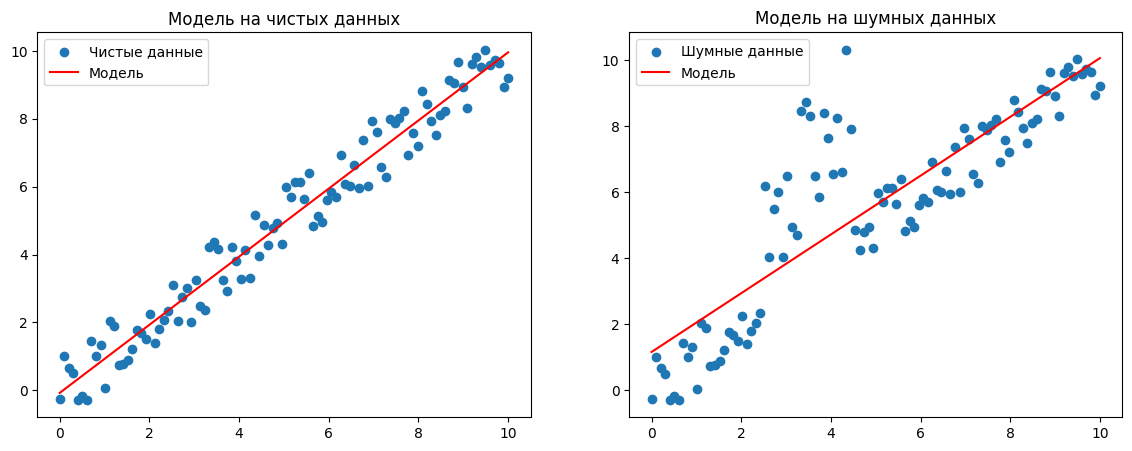

In [12]:
from data_generator import generate_clean_data, generate_noisy_data
from train_model import train_and_predict
import matplotlib.pyplot as plt

# clean
xs_clean, ys_clean = generate_clean_data()
model_clean, preds_clean = train_and_predict(xs_clean, ys_clean)

# noisy
xs_noisy, ys_noisy = generate_noisy_data()
model_noisy, preds_noisy = train_and_predict(xs_noisy, ys_noisy)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(xs_clean, ys_clean, label="Чистые данные")
axs[0].plot(xs_clean, preds_clean, color="red", label="Модель")
axs[0].set_title("Модель на чистых данных")
axs[0].legend()

axs[1].scatter(xs_noisy, ys_noisy, label="Шумные данные")
axs[1].plot(xs_noisy, preds_noisy, color="red", label="Модель")
axs[1].set_title("Модель на шумных данных")
axs[1].legend()

plt.show()

## Вывод

На графиках видно, что линейная модель хорошо подстраивается под «чистые» данные — линия предсказаний близка к точкам.

На шумных данных модель «сбивается»: из-за выбросов в диапазоне X ≈ [2.5; 4.5] она смещает линию, чтобы минимизировать общую ошибку. Это приводит к ухудшению точности на остальной части данных.

Таким образом, тесты подтвердили: качество модели зависит от качества данных. Подмешивание шумов делает предсказания менее точными.